In [1]:
import numpy as np
import pandas as pd

rating_df = pd.read_csv('./df_star.csv', 
                        low_memory=False, 
                        usecols=["user_id", "ISBN", "USERSTAR","BOOKNAME"]

                        )
rating_df.head(4)

95198

In [2]:
# 找出評論超過兩本書的使用者
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 2].index)].copy()
len(rating_df)

95198

In [3]:
# Scaling BTW
min_rating = min(rating_df['USERSTAR'])
max_rating = max(rating_df['USERSTAR'])
rating_df['USERSTAR'] = rating_df["USERSTAR"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['USERSTAR'])
print('Avg', AvgRating)

Avg 0.7619004600936995


In [4]:
duplicates = rating_df.duplicated()
if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 124 duplicates
> 0 duplicates


In [5]:
g = rating_df.groupby('user_id')['USERSTAR'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rating_df.groupby('ISBN')['USERSTAR'].count()
top_ISBN = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_ISBN, rsuffix='_r', how='inner', on='ISBN')

pd.crosstab(top_r.user_id, top_r.ISBN, top_r.USERSTAR, aggfunc=np.sum)

ISBN,9789571350813,9789573330127,9789573330806,9789573333166,9789579447607,9789866712982,9789866739798,9789866954108,9789866973420,9789867778383,9789868461406,9789868652378,9789868703612,9789868781900,9789869236478
user_id,,,,,,,,,,,,,,,
195,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,0.6,NaN,1.0,0.8,NaN,NaN,NaN
952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,0.8
1103,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,1.0,0.8,NaN,NaN,NaN
1314,0.8,NaN,NaN,NaN,NaN,NaN,NaN,0.8,1.0,NaN,0.8,0.8,0.8,NaN,NaN
1492,1.0,0.8,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,0.8,0.8,0.8,0.0,NaN
1553,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1840,0.8,0.8,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,0.6,0.8,NaN,NaN,NaN
1917,0.8,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936,NaN,1.0,NaN,NaN,NaN,1.0,0.8,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [6]:
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

ISBN_ids = rating_df["ISBN"].unique().tolist()
ISBN2ISBN_encoded = {x: i for i, x in enumerate(ISBN_ids)}
ISBN_encoded2ISBN = {i: x for i, x in enumerate(ISBN_ids)}
rating_df["ISBN"] = rating_df["ISBN"].map(ISBN2ISBN_encoded)
n_ISBN = len(ISBN2ISBN_encoded)

print("Num of users: {}, Num of ISBN: {}".format(n_users, n_ISBN))
print("Min STAR: {}, Max STAR: {}".format(min(rating_df['USERSTAR']), max(rating_df['USERSTAR'])))

Num of users: 4080, Num of ISBN: 46053
Min STAR: 0.0, Max STAR: 1.0


In [7]:
rating_df = rating_df.sample(frac=1, random_state=73)

X = rating_df[['user', 'ISBN']].values
y = rating_df["USERSTAR"]

In [8]:
# Split
test_set_size = 10000 #10k for test set
train_indices = rating_df.shape[0] - test_set_size 

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 85074
> Test set ratings: 10000


In [9]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [10]:
import tensorflow as tf
    
print(tf.__version__)

2.6.0


In [11]:
import keras
from keras import layers 
import tensorflow as tf
from keras.models import Model
from keras.optimizers import adam_v2

In [12]:
from keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten

def RecommenderNet():
    embedding_size = 128
    
    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users, 
                       output_dim = embedding_size)(user)
    
    ISBN = Input(name = 'ISBN', shape = [1])
    ISBN_embedding = Embedding(name = 'ISBN_embedding',
                       input_dim = n_ISBN, 
                       output_dim = embedding_size)(ISBN)
    
    #x = Concatenate()([user_embedding, ISBN_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, ISBN_embedding])
    x = Flatten()(x)
        
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)
    
    model = Model(inputs=[user, ISBN], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')
    
    return model

model = RecommenderNet()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
ISBN (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 128)       522240      user[0][0]                       
__________________________________________________________________________________________________
ISBN_embedding (Embedding)      (None, 1, 128)       5894784     ISBN[0][0]                       
______________________________________________________________________________________________

In [13]:
# Callbacks
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000


rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)

early_stopping = EarlyStopping(patience = 3, monitor='val_loss', 
                               mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,   
]

In [14]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=15,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/15
9/9 [==============================] - 3s 163ms/step - loss: 0.7326 - mae: 0.3461 - mse: 0.1569 - val_loss: 0.6931 - val_mae: 0.3382 - val_mse: 0.1397
Epoch 2/15
9/9 [==============================] - 1s 105ms/step - loss: 0.7310 - mae: 0.3455 - mse: 0.1562 - val_loss: 0.6930 - val_mae: 0.3382 - val_mse: 0.1397
Epoch 3/15
9/9 [==============================] - 1s 134ms/step - loss: 0.7287 - mae: 0.3445 - mse: 0.1551 - val_loss: 0.6930 - val_mae: 0.3381 - val_mse: 0.1397
Epoch 4/15
9/9 [==============================] - 1s 133ms/step - loss: 0.7255 - mae: 0.3432 - mse: 0.1536 - val_loss: 0.6929 - val_mae: 0.3381 - val_mse: 0.1397
Epoch 5/15
9/9 [==============================] - 1s 117ms/step - loss: 0.7214 - mae: 0.3416 - mse: 0.1517 - val_loss: 0.6929 - val_mae: 0.3380 - val_mse: 0.1396
Epoch 6/15
9/9 [==============================] - 1s 123ms/step - loss: 0.7164 - mae: 0.3396 - mse: 0.1494 - val_loss: 0.6928 - val_mae: 0.3379 - val_mse: 0.1396
Epoch 7/15
9/9 [============

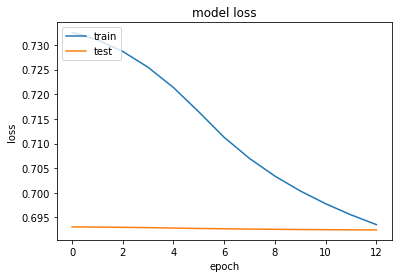

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [16]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('ISBN_embedding', model)
user_weights = extract_weights('user_embedding', model)

In [17]:
df = pd.read_json('./categ.json', lines=True)

In [18]:
# # Fixing Names
# def getAnimeName(ISBN_id):
#     try:
#         name = df[df.ISBN_id == ISBN_id].eng_version.values[0]
#         if name is np.nan:
#             name = df[df.ISBN_id == ISBN_id].Name.values[0]
#     except:
#         print('error')
    
#     return name

# df['ISBN_id'] = df['ISBN']
# df["eng_version"] = df['書名']
# df['eng_version'] = df.ISBN_id.apply(lambda x: getAnimeName(x))

# df.sort_values(by=['Score'], 
#                inplace=True,
#                ascending=False, 
#                kind='quicksort',
#                na_position='last')

# df = df[["ISBN_id", "eng_version"]]
